<div style="text-align: right">
    <i>
        Spring 2022 <br>
    </i>
</div>

# Finite State Automata/Transducers with Pynini

## Preliminaries
Today we will use the [Pynini Python package](https://github.com/kylebgorman/pynini) for working with finite state transducers.


The latest version of Pynini is actually 2.1.3 (at the time of writing this) but it causes some problems in the Colab environonment (and also introduces some API changes), therefore we use version 2.0.9.

Since we are running this via Colab and Pynini is not a default package, I also needed a conda installer for Python 3.6 (Linux). 
Just make sure to execute all the following cells in the preamble.

In [ ]:
# Check what version of Python we are running (the Pynini needs at least Python 3.6)
import sys
print(sys.version)

3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local 
import sys

sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2022-03-03 00:57:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  80.6MB/s    in 1.0s    

2022-03-03 00:57:59 (80.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [ ]:
!conda install -c conda-forge pynini=2.0.9 --yes

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pynini=2.0.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forg

In [ ]:
import pynini as pn

## Implementing FSAs with Pynini
OK! We are finally set up to use this library. 

Let's first try creating some finite state acceptors. We need a bit of syntax.

A single acceptor transition can be created using the `pynini.acceptor()` function. 

A repeated state can be specified using `closure()`. Just `closure(fst)` means "repeat zero or more times", `closure(fst, n)` means "repeat at least n times, and `closure(fst, m, n)` means "repeat m to n times".

Let's create a FSA for the regular expression `a*bbc+`:

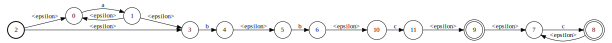

In [ ]:
pn.closure(pn.acceptor("a")) + pn.acceptor("b") + pn.acceptor("b") + pn.closure(pn.acceptor("c"),1)

### **Exercise 1. (5 points)** Thinking back to the formal properties of FSAs, can you figure out why pynini adds all these epsilon transitions? Why are loops represented the way they are?


**Pynini adds the epsilons to ensure closure**


Now, most pynini functions have shorthand aliases: a() can be used instead of acceptor():

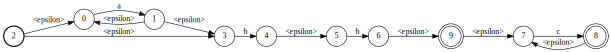

In [ ]:
pn.closure(pn.a("a")) + pn.acceptor("b") + pn.a("b") + pn.closure(pn.a("c"))

The FSA that is created as a result of many atomic FSA operations is not optimal: it has more transisions and states than needed. The `optimize()` function makes it optimal, and easier to understand:

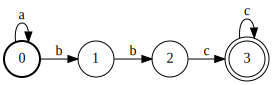

In [ ]:
fsa1 = pn.optimize(pn.closure(pn.a("a")) + pn.acceptor("b") + pn.a("b") + pn.closure(pn.a("c"), 1))
fsa1

Let's now test what kind of strings does this FSA accept. Use the pynini `matches()` function for this:

In [ ]:
pn.matches(fsa1, "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabbc")

True

In [ ]:
pn.matches(fsa1, "abbc")

True

In [ ]:
pn.matches(fsa1, "aac")

False

In [ ]:
pn.matches(fsa1, "aaac")

False

The sequence `p.a("b") + p.a("b")` can be also written in shorthand form, using `p.a("bb")`:

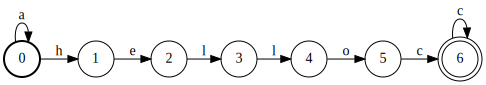

In [ ]:
fsa1 = pn.optimize(pn.closure(pn.a("a")) + pn.acceptor("hello") + pn.closure(pn.a("c"), 1))
fsa1

More about the closure() method:

The following are the equivalents for the closure-style syntax used in
Perl-style regular expressions:

    Regexp:             This method:            Copy shortcuts:

    /x?/                x.closure(0, 1)         x.ques
    /x*/                x.closure()             x.star
    /x+/                x.closure(1)            x.plus
    /x{N}/              x.closure(N, N)
    /x{M,N}/            x.closure(M, N)
    /x{N,}/             x.closure(N)
    /x{,N}/             x.closure(0, N)

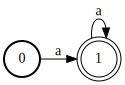

In [ ]:
pn.optimize((pn.a("a").plus))

Let's try with another FSA for a real world example. This will be and FSA that can accept US money amounts, e.g. `one dollar`, `one dollar fifty cents`, etc.

Let's start from a one that recognizes simpler dollar expressions, like "two dollars".

First, we have to define a FSA that accepts digits: "one", or "two", etc. We'll use the pynini `union()` (alias: `u()`) for creating the set of alternative digits.

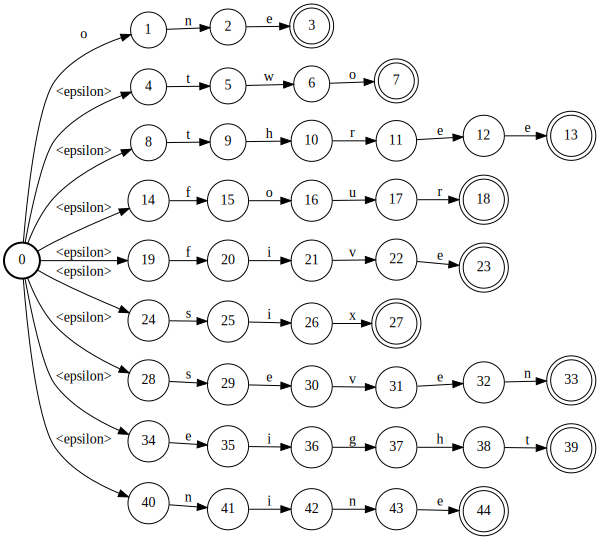

In [ ]:
a_1_to_9 = pn.u("one", "two", "three", "four", "five", "six", "seven", "eight", "nine")
a_1_to_9

As you see, more complex FSAs quickly become quite difficult to understand based on their graphic representation.
Optimizing it doesn't really help:

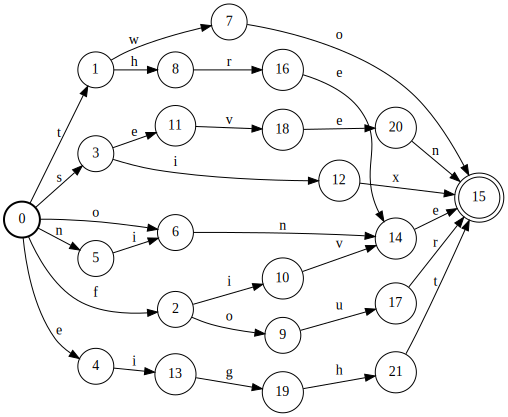

In [ ]:
a_1_to_9.optimize()

Let's do a quick check what this FSA accepts:

In [ ]:
pn.matches(a_1_to_9, "one")

True

In [ ]:
pn.matches(a_1_to_9, "foo")

False

OK, let's try to add dollars and cents:

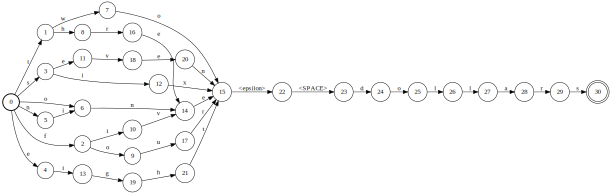

In [ ]:
a_1_to_9_dollars = (a_1_to_9 + " dollars")
a_1_to_9_dollars

In [ ]:
pn.matches(a_1_to_9_dollars, "one dollar")

False

Of course it's not really optimal, as it also accepts "one dollars", instead of "one dollar". Let's fix it:

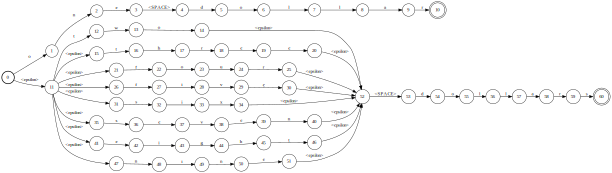

In [ ]:
a_2_to_9 = pn.u("two", "three", "four", "five", "six", "seven", "eight", "nine")
dollars = pn.u("one dollar", a_2_to_9 + " dollars")
dollars

In [ ]:
pn.matches(dollars, "one dollar")

True

In [ ]:
pn.matches(dollars, "one dollars")

False

In [ ]:
pn.matches(dollars, "two dollars")

True

In [ ]:
pn.matches(dollars, "two dollar")

False

But the money amount can also have cents. It can actually consist of only cents, like "two cents". Or only from dollars, or from both, like "one dollar two cents". But it shouldn't be empty.

In [ ]:
cents = pn.u("one cent", a_2_to_9 + " cents")

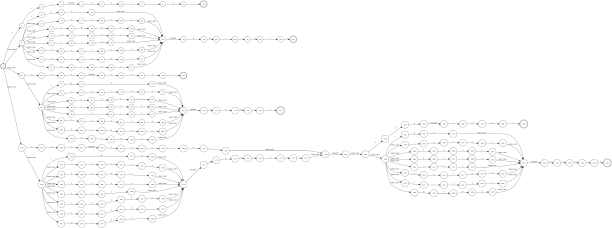

In [ ]:
money = pn.u(dollars, cents, dollars + " " + cents)
money

In [ ]:
pn.matches(money, "two cents")

True

In [ ]:
pn.matches(money, "two dollars one cent")

True

In [ ]:
pn.matches(money, "")

False

The resulting FSA is already now quite complex:

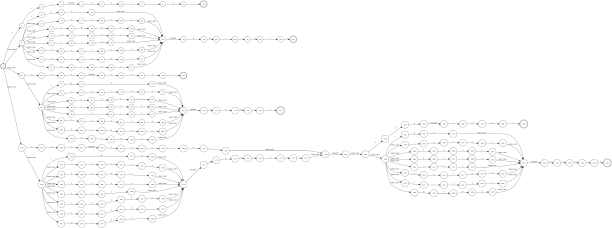

In [ ]:
money

Actually, it's complex because it deals with characters, not words. We can simplify it a bit if we make the transitions accept whole tokens, instead of characters. Pynini allows it if you put the tokens in square brackets:

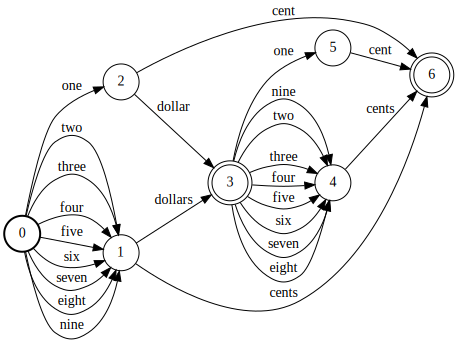

In [ ]:
a_2_to_9_words = pn.u("[two]", "[three]", "[four]", "[five]", "[six]", "[seven]", "[eight]", "[nine]")
dollars_words = pn.u("[one][dollar]", a_2_to_9_words + "[dollars]")
cents_words = pn.u("[one][cent]", a_2_to_9_words + "[cents]")
money_words = pn.u(dollars_words, cents_words, dollars_words + cents_words).optimize()
money_words

The above picture looks already much nicer! Note that the test string must then also be tokenized, with tokens surrounded by square brackets:

In [ ]:
pn.matches(money_words, "[one][dollar]")

True

One way to debug FSAs is to  generate random output, by selecting random paths from it's start state until the end state:

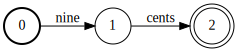

In [ ]:
pn.randgen(money_words)

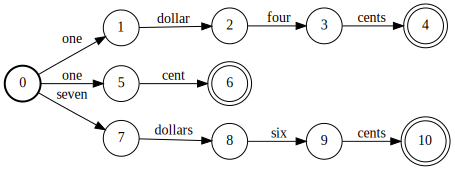

In [ ]:
pn.randgen(money_words, 3)

### **Exercise 2. (2 points)** 

Make this FSA accept more complex amounts, like "twenty one dollars thirteen cents" 


In [ ]:
# Add your code here
a_1_to_9_words = pn.u("[one]", "[two]", "[three]", "[four]", "[five]", "[six]", "[seven]", "[eight]", "[nine]")
tens_words = pn.u("[eleven]", "[twelve]", "[thirteen]", "[fourteen]", "[fifteen]", "[sixteen]", "[seventeen]", "[eighteen]", "[nineteen]")
twenty_ninety = pn.u("[twenty]", "[thirty]", "[fourty]", "[fifty]", "[sixty]", "[seventy]", "[eighty]", "[ninety]")
dollars_words = pn.u("[one][dollar]", a_2_to_9_words + "[dollars]", tens_words + "[dollars]", twenty_ninety + "[dollars]", twenty_ninety + a_1_to_9_words + "[dollars]")
cents_words = pn.u("[one][cent]", a_2_to_9_words + "[cents]", tens_words + "[cents]", twenty_ninety + "[cents]", twenty_ninety + a_1_to_9_words + "[cents]")
money_words = pn.u(dollars_words, cents_words, dollars_words + cents_words).optimize()

pn.matches(money_words, "[twenty][one][dollars][thirteen][cents]")

True

### **Exercise 3. (3 points)** 

Construct a FSA that accepts English numbers from 0 to 99, given as words, e.g. `[twenty] [one]`. Try to be economical, don't just list all possible 100 variants

In [ ]:
# Add your code here
numbers_only_to99 = pn.u(a_1_to_9_words, tens_words, twenty_ninety, twenty_ninety + a_1_to_9_words)
pn.matches(numbers_only_to99, "[twenty][one]")

True

Let's now try to construct a naive FSA that accepts a very limited set of English nouns, like dog, cat, mouse, dogs, mice sheep, etc.

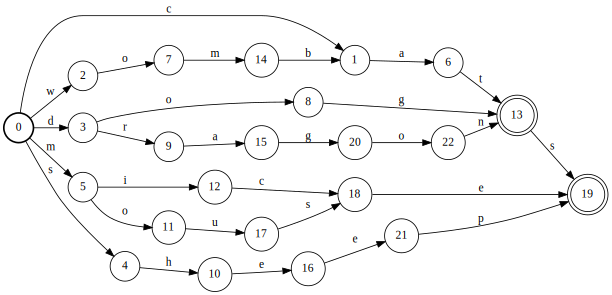

In [ ]:
reg_noun = pn.u("dog", "cat", "wombat", "dragon")
irreg_noun_sg = pn.u("mouse", "sheep")
irreg_noun_pl = pn.u("mice", "sheep")
nouns = pn.u(reg_noun, reg_noun + "s", irreg_noun_sg, irreg_noun_pl).optimize()
nouns

In [ ]:
pn.matches(nouns, "dogs")

True

In [ ]:
pn.matches(nouns, "mouses")

False

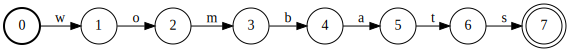

In [ ]:
pn.randgen(nouns)

In [ ]:
pn.randgen(nouns).stringify()

'sheep'

### **Exercise 4. (5 points)** 
Create a FSA that accepts Estonian nouns with at least 3 words and 3 inflections.
The words are:
  -  *karu, laud, vahvel*

The inflections are:
-  nimetav (e.g., karu - laud - vahvel)
- omastav (e.g., karu - laua - vahvli)
- kaasaütlev (e.g., karuga - lauaga - vahvliga). 

Try to reuse parts of omastav when constructing kaasaütlev, instead of just listing all nine varints of the words. That is, it should be easy to extend this FSA to understand new inflections.

In [ ]:
# Add your code here
estonian_noun = pn.u("karu", "laud", "vahvel")

nimetav_inflection = pn.u(estonian_noun)
omastav_inflection = pn.u("karu", "laua", "vahvli")
kaasautlev_inflection = pn.u(omastav_inflection + "ga")

e_nouns = pn.u(estonian_noun, omastav_inflection, kaasautlev_inflection)

pn.randgen(e_nouns).stringify()

'vahvliga'

## Implementing FSTs with Pynini

So far in this notebook we looked at acceptors. If your recall (if you don't go back to the slides!), transducers are like acceptors, but every arc has input and output symbols, instead of just input symbols. Note that by default, output symbols are equal to input symbols. So, actually every FSA is also an FST in Pynini.

A transducer arc is constucted using Pynini's transducer() (alias: t()) function. It takes two arguments: input and output symbols.


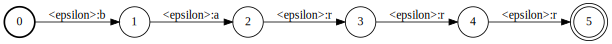

In [ ]:
pn.transducer("", "barrr")

Let's  construct a FST that accepts a string "aabdd" and changes it into "aacdd":

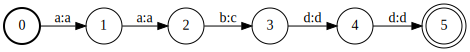

In [ ]:
fst0 = (pn.a("aa") + pn.t("b", "c") + pn.a("dd")).optimize()
fst0

Let's look at something more complicated. What mapping does the following FST recognize?

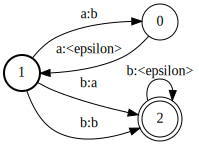

In [ ]:
fst1 = (pn.t("aa", "b").closure() + pn.u(pn.t("b", "a"), pn.a("b")) + pn.t("b", "").closure()).optimize()
fst1

Let's test:

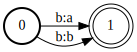

In [ ]:
"b" * fst1

We saw that the result of composing a string "b" with the FST is actually ambiguous: there are two paths, one resulting in output "a" and the other one in "b". This is because the FST is non-deterministic: it has to arcs from state 1 to state 2, both with input "b". The ambiguous result is conveniently represented as an FST.

To get the possible outputs as strings, use the paths() method of the resulting FST, and the `ostrings()` method or the resulting path iterator:

In [ ]:
list(("b" * fst1).paths().ostrings())

['a', 'b']

In [ ]:
def all_paths(fst):
    return list(fst.paths().ostrings())

all_paths("aaaaaabb" * fst1)

['bbba', 'bbbb']

Let's play some more with this FST:

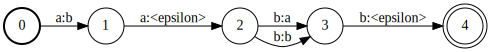

In [ ]:
("aabb" * fst1)

In [ ]:
all_paths("aabb" * fst1)

['ba', 'bb']

One thing that we did not discuss in the lecture, is the fact that any FST can be inverted: The inversion of a transducer switches the input and output labels.
Pynini implements inversion directly:

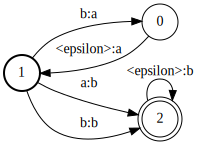

In [ ]:
fst1_invert = pn.invert(fst1)
fst1_invert

The inverse FST should apply the inverse mapping. I.e., if the original FST converts from "b" to "a", then the inverse should convert from "a" to "b". Let's try:

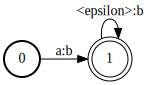

In [ ]:
"a" * fst1_invert

In [ ]:
all_paths("a" * fst1_invert)

FstOpError: ignored

Wait! It looks like the inversion worked (the first cell run) but then we get an error trying to get all the possible paths. Why is that?

It is because there is an infinite number of outputs that correspond to input "a": b, bb, bbbbbbbb, etc. (Do you see why? Do you see that arc `<epsilon>:b` from the final state? We can take this arc any number of times).

To address this issue, we can use the `pynini.shortestpath(fst, nshortest=10)` function to select 10 shortest paths from the resulting FST. Note that "shortest" here means shortest in the FST sense, i.e., the paths with the minimum *cost*. Since all our paths have a cost of zero (since we haven't added any weights to them), all paths have the same cost, and `shortestpath()` selects random paths:

In [ ]:
list((pn.shortestpath("a" * fst1_invert, nshortest=10)).paths().ostrings())

['bbbbbbbb',
 'bbbbbbbbb',
 'bbbbbbbbbb',
 'bbbb',
 'bbbbb',
 'bbbbbb',
 'bbb',
 'bb',
 'bbbbbbb',
 'b']

Let's make a new function to actually do that:

In [ ]:
def top10_paths(fst):
    return list(pn.shortestpath(fst, nshortest=10).paths().ostrings())

top10_paths("a" * fst1_invert)

['bbbbbbbb',
 'bbbbbbbbb',
 'bbbbbbbbbb',
 'bbbb',
 'bbbbb',
 'bbbbbb',
 'bbb',
 'bb',
 'bbbbbbb',
 'b']

Ok, now that we know basic Pynini syntax, let's try do do some simple morphological analysis using FSTs.

Let's look at three Estonian words *ratsu, kõne, male*. They all inflect in the same way:
  * Nominative: ratsu, kõne, male
  * Genitive: ratsu, kõne, male
  * Partitive: ratsut, kõnet, malet 
  * Illative: ratsusse, kõnesse, malesse
  
We want to define an FST which accepts all the above words in the four inflections, and output the word in Nominative case, with an appended infection marker, e.g.: 

 >ratsusse -> ratsu /ill/
 
 > kõnet -> kõne /p/.

Let's first try to define the stems, and a transducer for nominative inflection:

In [ ]:
stems = pn.union("ratsu", "kõne", "male", "karka")
nominative = stems + pn.t("", " /nom/")

Question: Do you get what the second line does?

In [ ]:
#Let's test it!
top10_paths("ratsu" * nominative)

['ratsu /nom/']

Ok, let's now define transducers for the other infections.

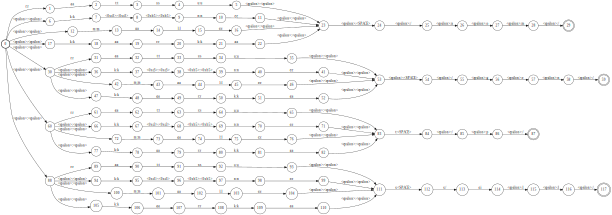

In [ ]:
genitive = stems + pn.t("", " /gen/")
partitive = stems + pn.t("t", " /p/")
illative = stems + pn.t("sse", " /ill/")

wordform_to_analysis = pn.u(nominative, genitive, partitive, illative)

wordform_to_analysis

Note how the FST correctly captures the fact that the word `ratsu` has actually two ambiguous analyses: `ratsu` can be either nominative or genitive -- both use the same word form:

In [ ]:
top10_paths("ratsu" * wordform_to_analysis)

['ratsu /nom/', 'ratsu /gen/']

In [ ]:
top10_paths("karkasse" * wordform_to_analysis)[0]

'karka /ill/'

One of the nice things about FSTs is that they can be inverted, as we already learned. But it turns out that this is really useful in the context of morphological analysis. If we invert a FST that does morphological analysis, we get a FST that does morphological generation! Let's try:

In [ ]:
analysis_to_wordform = pn.invert(wordform_to_analysis)
top10_paths("karka /ill/" * analysis_to_wordform)

['karkasse']

Now, we discussed in the lecture that one of the most useful FST operations are context-dependent rewrite operation.

For example, we can define an FST which transforms *b* to *c* ONLY when *b* occurs between *a* and *d*. As we saw in class, this can be formalized as a rewrtite rule of the form:

>  b → c/a___d

An example of the application of this rule would be:

> abbabdc -> abbacdc


If you have taken a phonology class, you might notice that this looks exactly like a phonological rewrite rule! So let's define an FST for it:

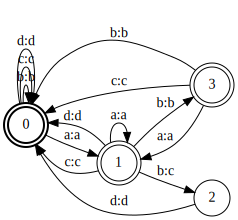

In [ ]:
rewrite_fst = pn.cdrewrite(pn.t("b", "c"), "a", "d",pn.u(*"abcd").closure()).optimize()
rewrite_fst

Note that the last argument to cdrewrite, `pn.u(*"abcd").closure()` must be a cyclic, unweighted acceptor representing the closure over the alphabet (what happens if you don't do that?). I.e., it represents all the possible strings that can be input to cdrewrite. Let's check what this FST does:

In [ ]:
top10_paths("abd" * rewrite_fst)

['acd']

In [ ]:
top10_paths("abbabdc" * rewrite_fst)

['abbacdc']

If the left context and right context do not match, it doesn't do anything.

In [ ]:
top10_paths("b" * rewrite_fst)

['b']

We may leave the right (or left) context empty, then this context is not checked:

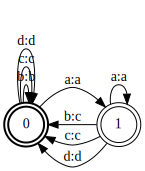

In [ ]:
rewrite_fst2 = pn.cdrewrite(pn.t("b", "c"), "a", "", pn.u(*"abcd").closure()).optimize()
rewrite_fst2



Note that the left context and right context do not need to be strings -- they can be any acceptors. For example, let's modify the rewrite FST so that it replaces "b" with "c" if "a" is seen *anywhere* before the "c", not necessarily immidiately before it:

In [ ]:
rewrite_fst3 = pn.cdrewrite(pn.t("b", "c"), "a" + pn.u(*"abcd").closure(), "", pn.u(*"abcd").closure()).optimize()
top10_paths("ab" * rewrite_fst3)

['ac']

In [ ]:
top10_paths("cccb" * rewrite_fst3)

['cccb']

In [ ]:
top10_paths("accccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccb" * rewrite_fst3)

['accccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc']

The cdrewrite function is useful for making a morphological analyzer more flexible. Let's try to make an analyzer for the Estonian words vahvel, noobel, number. They inflect as:

  * Nominative: vahvel, noobel, number
  * Genitive: vahvli, noobli, numbri
  * Partitive: vahvlit, nooblit, numbrit
  * Illative: vahvlisse, nooblisse, numbrisse
  
These words are more complicated then what we saw before, because different inflections are not a result of just adding a suffix to the nominative stem (as with the word "ratsu") -- for example, the stem also changes from "vahvel" to "vahvl".

Let's first make a FST that can inflect all words based on the ending, where the ending is seperated by "^":

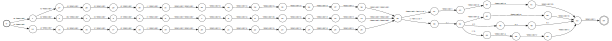

In [ ]:
words = ["number", "vahvel", "noobel"]
end_analyzer = pn.string_map(words) + pn.u(pn.t("^it", " /part/"), pn.t("^isse", " /ill/"), pn.t("^i", " /gen/"), pn.t("", " /nom/")).optimize()
end_analyzer

This FST can analyze words where the ending has been properly seperated:

In [ ]:
top10_paths("number^i"* end_analyzer)

['number /gen/']

Now let's create another FST that can transform "numbri" to "number^i" and "vahvli" to "vahvel^i":

In [ ]:
sigma_star = pn.u(*"abdefghjiklmnoprstuvõäöüxy^").closure()
stem_change = pn.cdrewrite(pn.u(pn.t("li", "el^i"), pn.t("ri", "er^i")), "", pn.union("", "s", "sse", "ga") + "[EOS]", sigma_star).optimize()

top10_paths("numbri"* stem_change)

['number^i']

The stem change li -> el^i, ri -> er^i is only applied if the left context is "[EOS]", "s[EOS]", "sse[EOS]", etc. Here [EOS] is Pynini's special symbol for the end-of-string. This is needed because we don't want any other occurrences of "li" to be replaced, e.g. "ribambri" should be changed to "ribamber^i", not "er^ibamber^i". Let's check:

In [ ]:
top10_paths("ribambri"* stem_change)

['ribamber^i']

And now, we can put the two FSTs together, by composing them:

In [ ]:
wordform_to_analysis2 = stem_change * end_analyzer

top10_paths("numbri" * wordform_to_analysis2)

['number /gen/']

Can we invert it, as we did before with the simpler analyzer?

In [ ]:
analysis_to_word2 = pn.invert(wordform_to_analysis2)

In [ ]:
top10_paths("number /gen/" * analysis_to_word2)

['number^i', 'numbri']

What happened? Why is 'number^i' also returned as a possible word form? This is because the cdrewrite operation is optional. In fatc,  when we input 'number^i' with our analysis_to_word2, it will happily analyze it (which is of course a problem):

In [ ]:
top10_paths("number^i" * wordform_to_analysis2)

['number /gen/']

In order to fix this, we have to change our FST so that it wouldn't even accept a string containing "^". We can do it by just putting an acceptor before everything, that doesn't accept a string containing "^":

In [ ]:
valid_chars = pn.u(*"abdefghjiklmnoprstuvõäöüxy").closure().optimize()
wordform_to_analysis2 = (valid_chars *stem_change * end_analyzer)
top10_paths("numbri" * wordform_to_analysis2)

['number /gen/']

In [ ]:
top10_paths("number^i" * wordform_to_analysis2)

[]

In [ ]:
analysis_to_word2 = pn.invert(wordform_to_analysis2)
top10_paths("number /gen/" * analysis_to_word2)

['numbri']

We can now even put our two analyzers together:

In [ ]:
composite_wordform_to_analysis = pn.u(wordform_to_analysis, wordform_to_analysis2)

In [ ]:
top10_paths("numbri" * composite_wordform_to_analysis)

['number /gen/']

In [ ]:
top10_paths("ratsu" * composite_wordform_to_analysis)

['ratsu /nom/', 'ratsu /gen/']

As before, we can use random generation to check whether the big FST generates only valid output

In [ ]:
for w in (top10_paths(pn.randgen(composite_wordform_to_analysis, 5))): print(w)

male /gen/
ratsu /nom/
noobel /gen/
kõne /nom/
vahvel /nom/


Finally, a remark about the concept of **nothing**. It's important to understand you can transduce "something" from "nothing". For example, you can use the following transducer for put spaces between each character (see how `pn.t("", " ")` transduces empty string into space):

In [ ]:
one_character = pn.u(*"abdefghjiklmnoprstuvõäöüxy")
spacer = (one_character +  pn.t("", "     ")).closure() + one_character

In [ ]:
("skdjhgskjhgksjhdgksjhdksjfksjhfkjshfd" * spacer).stringify()

's     k     d     j     h     g     s     k     j     h     g     k     s     j     h     d     g     k     s     j     h     d     k     s     j     f     k     s     j     h     f     k     j     s     h     f     d'

### **Exercise 5 (5 points).** 


In the previous homework, you had to define and FST for liquid harmony. Implement it here using Pynini, and verify that it works correctly by testing it on a few examples.

### **Extra Credit Exercise (Optional, 10 points).** 

The lecture slides discuss an example of an FST to handle the English orthographic rule of *e- insertion*. In the slides I aslo included a table (adapted from Jurawski and Martin) with examples of few other spelling rules for English. Write a transducer that handles either of 
- (a) the K insertion rule 
- (b) the consonant doubling spelling rule. 

You can pick whichever of the two looks more intuitive to you. 
Start by providing a formalization of the descriptive rule in terms of rewrite rule (I will not grade the correctness of the rewrite rule, nor I expect your FST to be perfect. Just provide an implementation that handles what you consider general cases. I will use your rule to check what your transducer aims to do, and if it actally does it).

 Also provide some test in terms of expected input-output pairs, and provide code to test your implemetation (as we did for all the FSAs and FSTs above)

**Add your answer here**

- provide your rewrite rule(s) here
- provide some expected input-output pairs here

In [ ]:
# Add your code here